In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swabn
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
# get list of detected filtered isoforms
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
t_df, regions, counts = get_ic_tss_tes(sg,
                                         df,
                                         min_tpm=1, 
                                         gene_subset='polya',
                                         annot_slack=200,
                                         novel_slack=100)

# add 90% set triplets
df = pd.read_csv('../swan/isos_sample_gene_90.tsv', sep='\t')
temp = compute_triplets(t_df,
                        df, 
                        groupby='sample')
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 156027
# isos >= 1 tpm: 141390
Applying gene type and novelty subset
Number of isos reported: 92963
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 352297
# genes >= 1 tpm: 217535
Applying gene type and novelty subset
Averaging over biosample
Found 31 total samples
Number of genes reported: 31968


In [3]:
# save all triplets
counts.to_csv('90_set_triplets.tsv', sep='\t', index=False)

## Plotting

In [2]:
c_dict, order = get_biosample_colors()
c_dict['GENCODE'] = 'k'
counts = pd.read_csv('90_set_triplets.tsv', sep='\t')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


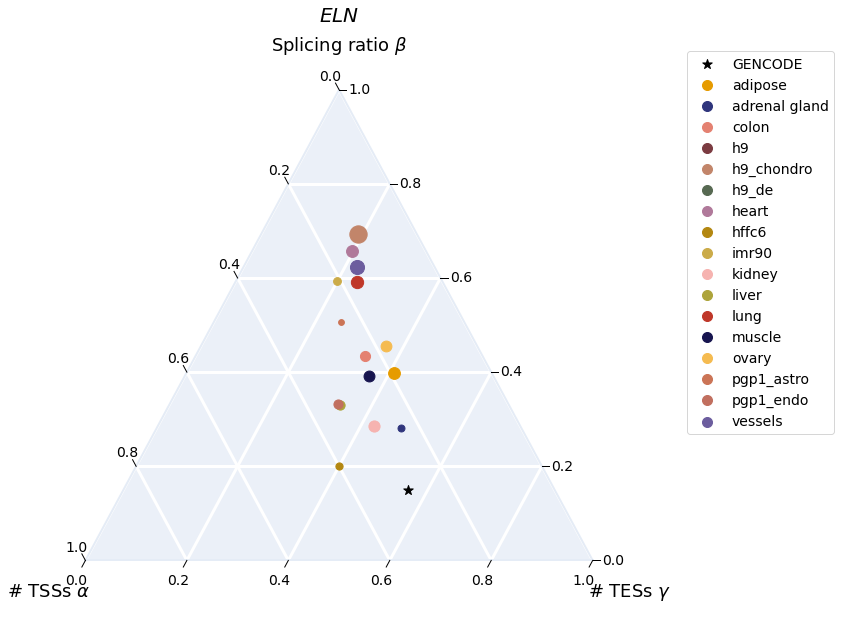

In [3]:
# ELN
gc_c_dict = c_dict
gc_c_dict['GENCODE'] = 'k'
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='ELN',
            hue='source',
            size='tpm', 
            log_size=True,
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

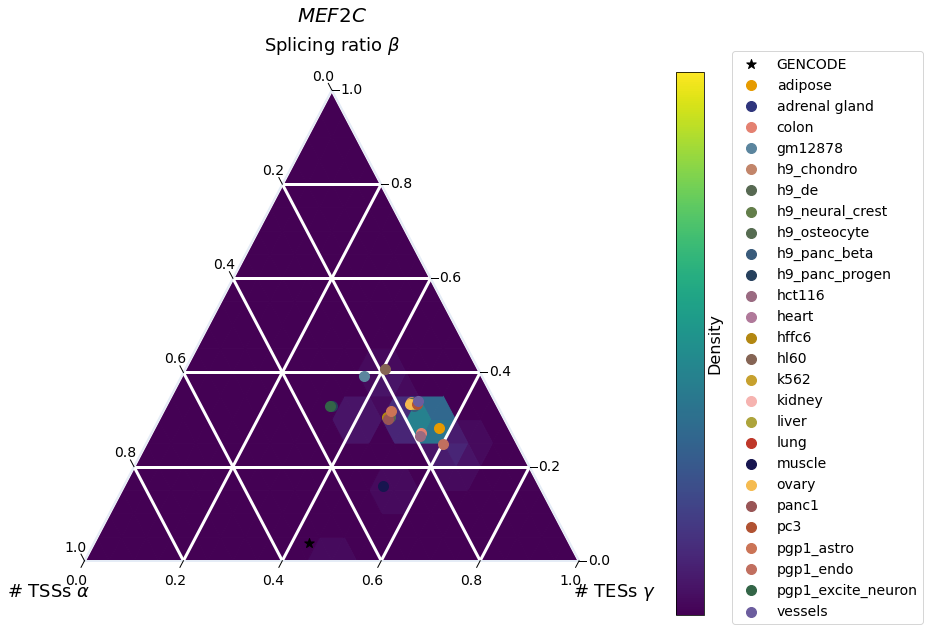

In [4]:
# MEF2C
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            density=True,
            density_scale=20,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

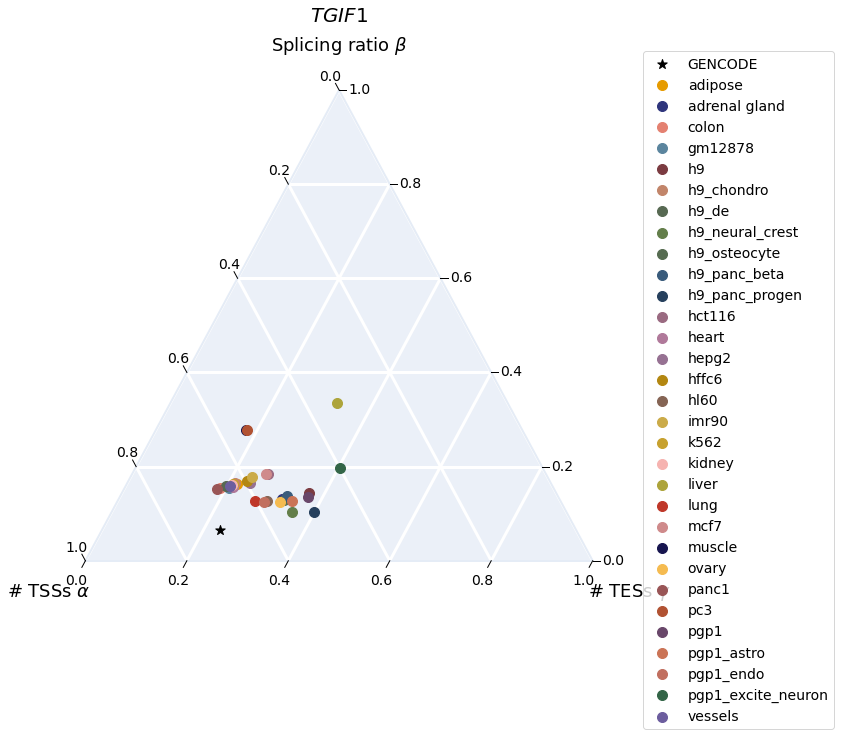

In [5]:
# TGIF1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TGIF1',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

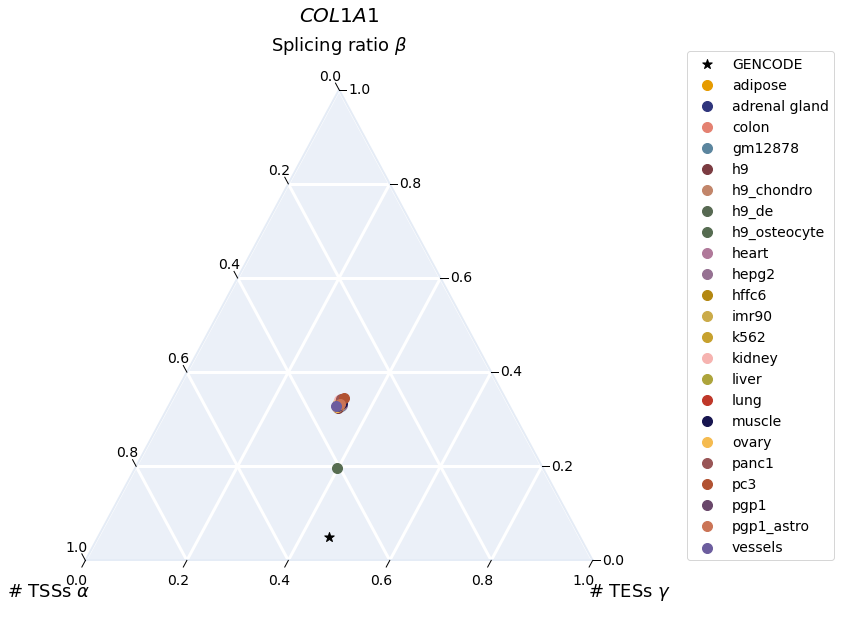

In [6]:
# COL1A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

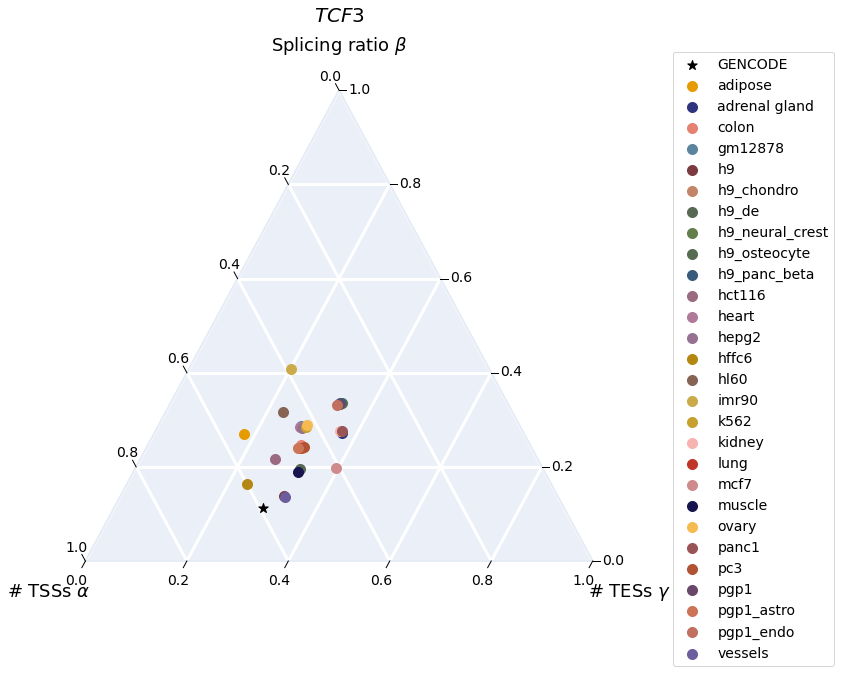

In [7]:
# TCF3
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

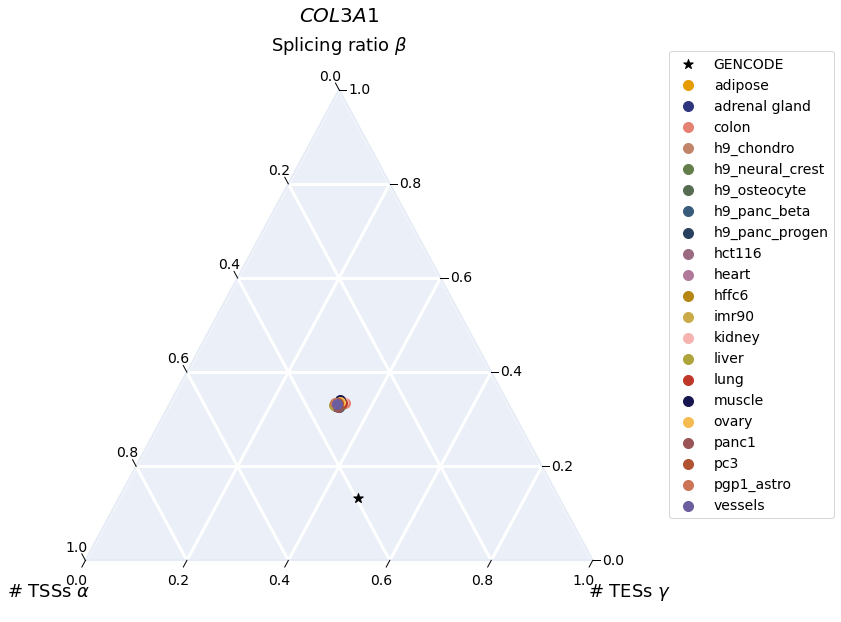

In [10]:
# TCF3
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL3A1',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})